# Prototype of an Image Classfication Model

In [1]:
# Import the necessary libraries:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential# used for the model

In [2]:
# import the data from kaggle:
import opendatasets as od
import pandas

#download the data using a kaggle api:
od.download("https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/")
dataset_path = "./animal-image-dataset-90-different-animals/"#path to the data


Skipping, found downloaded files in ".\animal-image-dataset-90-different-animals" (use force=True to force download)


## Original: Gather the Data:

In [4]:
#Load the Data into an array
files = os.listdir(dataset_path)#view how the data is stored:
#paths to the files
folder_path = os.path.join(dataset_path, files[0],files[0])#path to the images
text_file_path = os.path.join(dataset_path, files[1])# names of animals
print(text_file_path)
print(os.listdir(folder_path))
    
#Read the Text file with animal names:
def read_name_file():
    names = []
    with open(text_file_path, 'r') as file:
        for line in file.readlines():
            names.append(line.strip())
    file.close()
    return names

#Gather all the images with animal names in one array:
def create_dataset():
    dataset = []
    # Loop through each name in the text file
    for name in names:
        animal_folder_path = os.path.join(folder_path, name)
        #Exception Handling to check if the folder exists:
        if os.path.exists(animal_folder_path):
            # Loop through each image in the folder
            image_files = os.listdir(animal_folder_path)
            for img in image_files:
                image_path = os.path.join(animal_folder_path, img)
                dataset.append((image_path, name))
        else:
            print("Folder not found for "+animal_name)

    return dataset

names = read_name_file()#read the text file

dataset = create_dataset()# Create the dataset

print(dataset[:2])#test to see if it worked

./animal-image-dataset-90-different-animals/name of the animals.txt
['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']
[('./animal

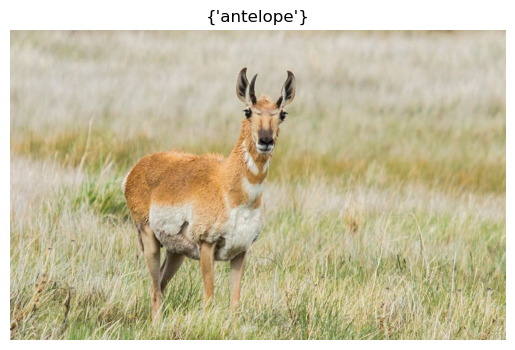

Image 1 - Class: antelope, Size: (1640, 1025)


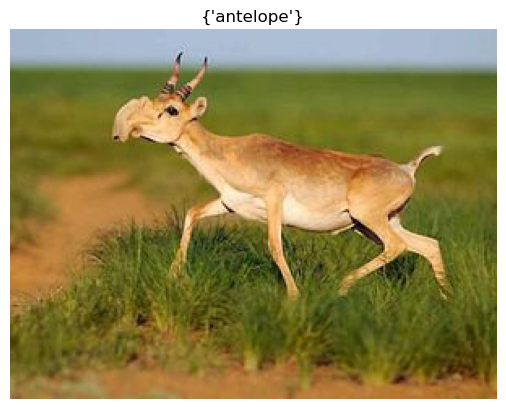

Image 2 - Class: antelope, Size: (300, 228)


In [8]:
# Visualise the Data:
for i in range(2):
    image_path, label = dataset[i]

    # Check if the current item is a file
    if os.path.isfile(image_path):
        # Load the image
        img = PIL.Image.open(image_path)
        image_size = img.size
        plt.imshow(img)
        plt.title({label})
        plt.axis('off')
        plt.show()# Display the image
        # Get the size of the image
        # Display the image size
        print(f"Image {i + 1} - Class: {label}, Size: {image_size}")
    else:
        print("Error")

## Improved Version of Loading the Data

In [3]:
#Loading the Data in a faster and more efficient manner:
files = os.listdir(dataset_path)#gather the path:
#paths to the files
folder_path = os.path.join(dataset_path, files[0],files[0])#path to the images
#tf.keras.utils.image_dataset_from_directory??

data  = tf.keras.utils.image_dataset_from_directory(folder_path)
data_iterator = data.as_numpy_iterator()# like an iterator  in Java
batch = data_iterator.next()

batch[0].shape

Found 5400 files belonging to 90 classes.


(32, 256, 256, 3)

## Preprocessing:

In [4]:
data = data.map(lambda x,y: (x/255, y))# tf function map to rescale the images
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

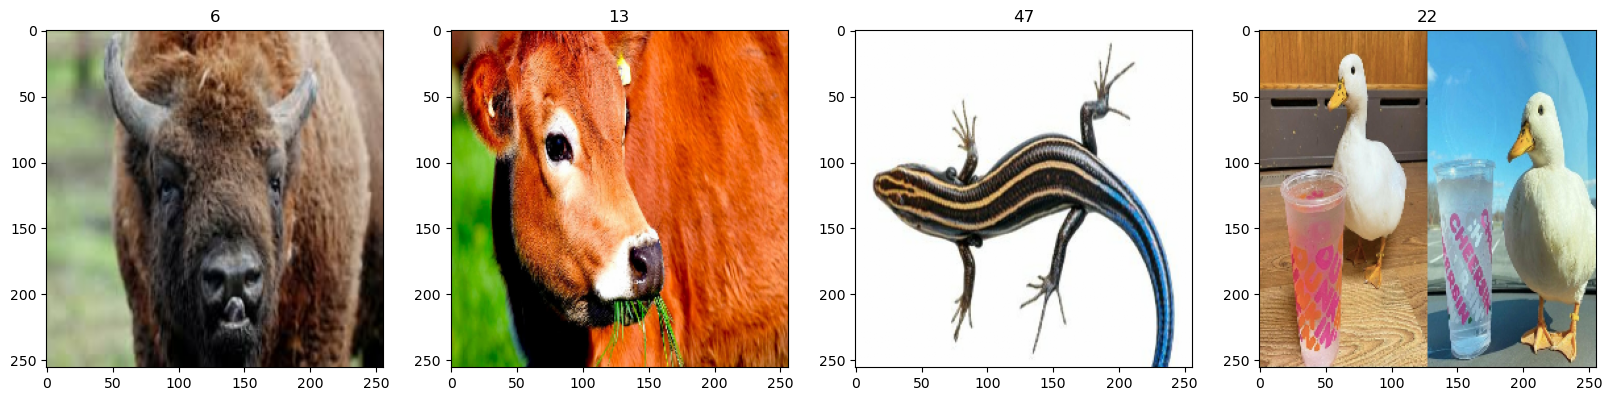

In [5]:
#visualise the data:
fig, axis = plt.subplots(ncols=4, figsize=(20, 20))
batch_images = batch[0][:4]
batch_labels = batch[1]

for idx in range(4):
    axis[idx].imshow(batch_images[idx])
    axis[idx].title.set_text(batch_labels[idx])

In [6]:
batch[0].max()

#Split the data:
len(data)#169 batches of 32
#Size for each batch: (70% train, 15% validation, 15% test)
train_size = round(len(data) * 0.7)
validation_size = round((len(data) - train_size) / 2)
test_size = len(data) - train_size - validation_size
print(train_size,validation_size,test_size)

118 26 25


In [7]:
#Alocate the Batches to the data:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(validation_size)
test_data = data.skip(train_size+validation_size).take(test_size)

## Training the Network

In [8]:
#import the relative layers
from tensorflow.keras.models import Sequential# used for the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

In [9]:
model = Sequential()

# Convolutional Layers:
model.add(Conv2D(16, (3, 3), 1, input_shape=(256, 256, 3)))#filter size 3 by 3 and the stride is 1
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

model.add(Conv2D(32, (3, 3), 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())# Flatten the output and add Dense for classification
model.add(Dense(256))#fully connected layers
model.add(BatchNormalization())#batch normalisation added
model.add(Activation('relu'))
model.add(Dropout(0.5))# Dropout
model.add(Dense(90, activation='softmax')) # 90 outputs


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#compile the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      1

In [ ]:
history = model.fit(train_data, epochs=15, validation_data=val_data)

Epoch 1/15
118/118 [==============================] - 190s 2s/step - loss: 4.5265 - accuracy: 0.0487 - val_loss: 4.8819 - val_accuracy: 0.0096
Epoch 2/15
118/118 [==============================] - 183s 2s/step - loss: 3.4482 - accuracy: 0.1962 - val_loss: 4.9337 - val_accuracy: 0.0168
Epoch 3/15
118/118 [==============================] - 188s 2s/step - loss: 2.3176 - accuracy: 0.4815 - val_loss: 5.0348 - val_accuracy: 0.0180
Epoch 4/15
118/118 [==============================] - 194s 2s/step - loss: 1.2738 - accuracy: 0.7696 - val_loss: 3.4411 - val_accuracy: 0.2909
Epoch 5/15
118/118 [==============================] - 204s 2s/step - loss: 0.6283 - accuracy: 0.9179 - val_loss: 2.8348 - val_accuracy: 0.4267
Epoch 6/15
118/118 [==============================] - 206s 2s/step - loss: 0.3079 - accuracy: 0.9706 - val_loss: 2.5013 - val_accuracy: 0.4531
Epoch 7/15
 70/118 [================>.............] - ETA: 1:08 - loss: 0.1691 - accuracy: 0.9879

## Evaluating the Model

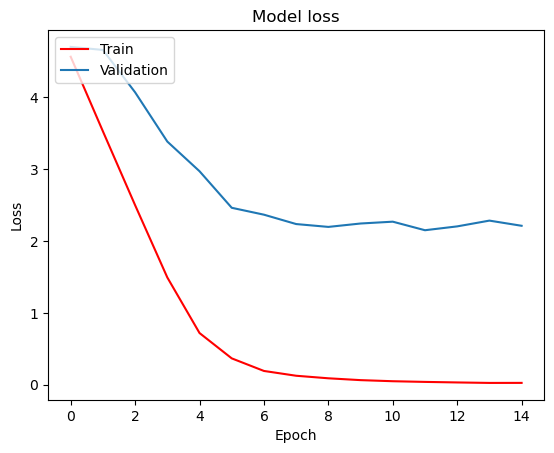

In [12]:
#plot the training process for the loss function:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')#loss func ploted
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

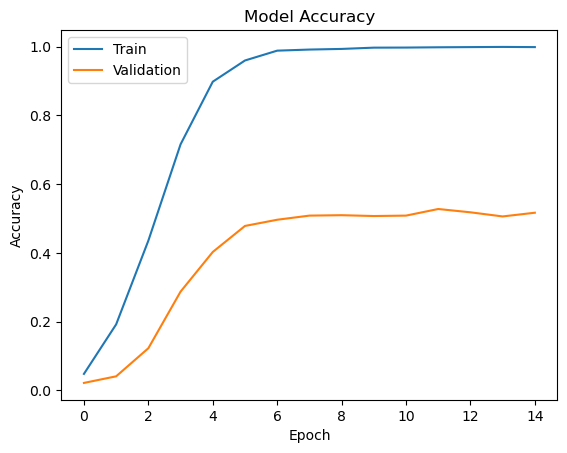

In [13]:
#plot the training process for the accuracy:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'], loc='upper left')

## Evaluate the Model On Test Data:

In [30]:
test_results = model.evaluate(test_data)

# Print the test accuracy and loss
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

25/25 [==============================] - 21s 265ms/step - loss: 3.0465 - accuracy: 0.3573
Test Loss: 3.0465497970581055
Test Accuracy: 0.35732322931289673


## Save the Model

In [37]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','protoype_model.h5'))

In [38]:
retrieved_model = load_model(os.path.join('models','protoype_model.h5'))#retrieve the model